In [1]:
import numpy as np
import pandas as pd
import json

In [2]:
import plotly.express as px
import plotly.io as pio


In [29]:
df = pd.read_csv("../일당평균생활인구수_행정동.csv", index_col = 0)
df

,년,월,주말,행정동코드,총생활인구수,10세 이하,10대,20대,30대,40대,50대,60대,70세 이상,통계청행정동코드,행자부행정동코드,시도명,시군구명,행정동명
0,2019,1,False,11110515,393388.956522,22095.130435,31747.043478,55759.826087,62022.130435,73074.608696,54133.739130,35318.043478,46147.565217,1101072,11110515,서울,종로구,청운효자동
1,2019,1,True,11110515,383698.875000,21876.750000,31035.375000,56868.125000,55037.250000,69006.250000,52860.375000,36229.875000,48421.875000,1101072,11110515,서울,종로구,청운효자동
2,2019,2,False,11110515,370118.227273,20885.454545,29995.772727,52582.772727,58694.136364,68773.500000,50633.954545,32471.909091,42593.181818,1101072,11110515,서울,종로구,청운효자동
3,2019,2,True,11110515,350495.625000,20029.500000,28079.125000,51263.875000,51003.125000,63848.000000,47988.625000,32301.250000,43241.875000,1101072,11110515,서울,종로구,청운효자동
4,2019,3,False,11110515,409505.727273,27177.727273,51132.454545,55846.227273,61798.909091,72298.045455,51628.545455,33935.454545,42776.181818,1101072,11110515,서울,종로구,청운효자동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,2019,10,True,11740700,725982.500000,50011.000000,59279.500000,79302.000000,96769.750000,102393.500000,110414.500000,97734.750000,103914.250000,1125071,11740700,서울,강동구,둔촌2동
10172,2019,11,False,11740700,746113.333333,50377.190476,60167.380952,77219.142857,98472.571429,105720.476190,111482.857143,100610.523810,115890.761905,1125071,11740700,서울,강동구,둔촌2동
10173,2019,11,True,11740700,726680.222222,48532.111111,59431.111111,78738.222222,97978.000000,104737.000000,109762.555556,97848.777778,103504.444444,1125071,11740700,서울,강동구,둔촌2동
10174,2019,12,False,11740700,741778.136364,49135.772727,59632.818182,78151.227273,97075.363636,105063.272727,109430.727273,100563.363636,116145.636364,1125071,11740700,서울,강동구,둔촌2동


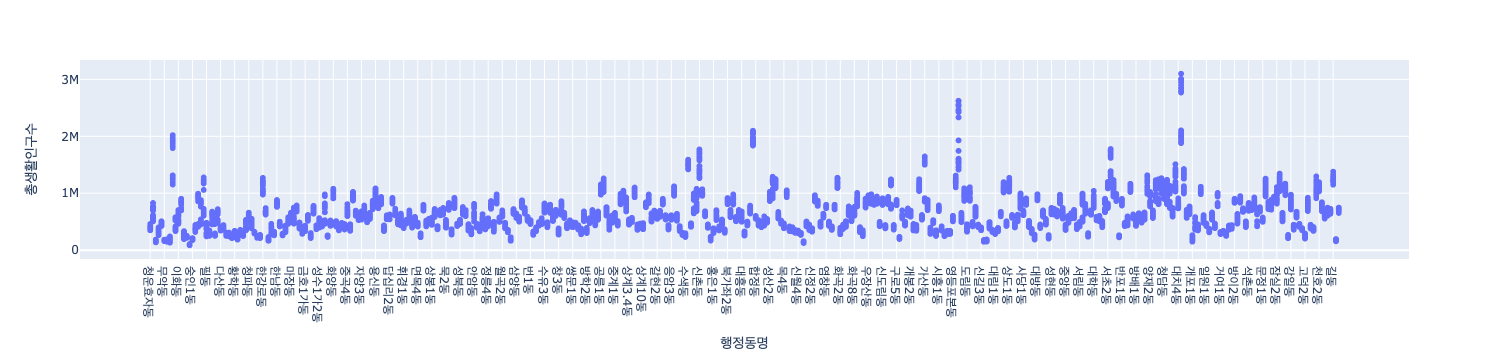

In [30]:
fig2d = px.scatter(df, x=df.행정동명, y=df.총생활인구수, hover_data=[df.행정동명, df.총생활인구수])
fig2d.show()

In [31]:
geo_json = json.load(open("../shp_행정구.geojson"))

In [25]:
# for i in range(len(geo_json['features'])):
#   geo_json['features'][i]['properties']['adm_cd2']=geo_json['features'][i]['properties']['adm_cd2'][0:8]

In [32]:
geo_json['features'][0]['properties']

{'년': 2019,
 '월': 1,
 '주말': False,
 '통계청행정동코드': '1101053',
 '행정동명': '사직동',
 '총생활인구수': 776704.0,
 'SIDO_CD': '11',
 'SIDO_NM': '서울특별시',
 'SIGUNGU_CD': '11010',
 'SIGUNGU_NM': '종로구',
 'ADM_CD': '1101053',
 'ADM_NM': '사직동'}

In [21]:
# df[df['행정동코드']==11680640]

In [22]:
# df[df['행정동코드']==11560540]

In [33]:
geo_json['features'][3]['properties']['통계청행정동코드']

'1101053'

In [34]:
fig=px.choropleth(df,
                  geojson = geo_json,
                  featureidkey='properties.통계청행정동코드',   
                  locations='통계청행정동코드',        #column in dataframe
                  animation_frame='주말',       #dataframe
                  color='총생활인구수',  #dataframe
                  color_continuous_scale='Inferno',
                  title='행정동별 생활인구수',  
                  height=1000
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [ ]:
fig

In [ ]:
fig.show()